In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jedi.plugins.django import mapping
%matplotlib inline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

#import per la valutazione dei modelli, creazione train test split e cross validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score

#modelli ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

#LISTA UTILE PER IMPORT DEI MODELLI

#feature selection and data processing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler, OrdinalEncoder
from sklearn.preprocessing import RobustScaler #when you have many outliers

#classification
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#regression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge #least squares
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

#CV STRATIFICATA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#CROSS VALIDATE (diversa da cross_val_score)
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion

from sklearn.impute import SimpleImputer #rimuove gli NaN

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler #when you have many outliers

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import FunctionTransformer

#RANDOM SEARCH PER IPERPARAMETRI

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

#ESEMPIO GRID SEARCH DI IPERPARAMETRI PER IL MODELLO KNN

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, validation_curve
from scipy.stats import uniform

from sklearn.utils import resample

from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.compose import ColumnTransformer


In [203]:
df = pd.read_csv('dataset_modified.csv')
df

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,occupancy_type,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Status
0,24890,2019,Sex Not Available,nopre,type1,p1,nopc,nob/c,116500,NaN,...,pr,1U,1740.0,EXP,758.0,CIB,25-34,to_inst,south,0
1,24891,2019,Male,nopre,type2,p1,nopc,b/c,206500,NaN,...,pr,1U,4980.0,EQUI,552.0,EXP,55-64,to_inst,North,1
2,24892,2019,Male,pre,type1,p1,nopc,nob/c,406500,4.560,...,pr,1U,9480.0,EXP,834.0,CIB,35-44,to_inst,south,1
3,24893,2019,Male,nopre,type1,p4,nopc,nob/c,456500,4.250,...,pr,1U,11880.0,EXP,587.0,CIB,45-54,not_inst,North,0
4,24894,2019,Joint,pre,type1,p1,nopc,nob/c,696500,4.000,...,pr,1U,10440.0,CRIF,602.0,EXP,25-34,not_inst,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21939,46829,2019,Sex Not Available,nopre,type1,p3,nopc,nob/c,146500,4.250,...,pr,1U,10260.0,CIB,723.0,EXP,>74,to_inst,south,1
21940,46830,2019,Male,pre,type2,p3,nopc,b/c,286500,3.990,...,pr,1U,8880.0,CRIF,616.0,EXP,35-44,to_inst,North,0
21941,46831,2019,Joint,nopre,type1,p4,nopc,nob/c,266500,3.625,...,pr,1U,6240.0,EXP,768.0,EXP,45-54,to_inst,south,1
21942,46832,2019,Female,nopre,type1,p4,nopc,nob/c,586500,NaN,...,pr,1U,10440.0,EQUI,503.0,EXP,35-44,not_inst,south,0


In [204]:
print(df.shape[0])
print(df.isnull().sum().sum())
print(df.isnull().sum())
print(df['Status'].value_counts())

21944
9125
ID                              0
year                            0
Gender                          0
approv_in_adv                 131
loan_type                       0
loan_purpose                   17
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             5347
term                            9
lump_sum_payment                0
property_value               2242
construction_type               1
occupancy_type                  1
total_units                     1
income                       1318
credit_type                     1
Credit_Score                    1
co-applicant_credit_type        1
age                            27
submission_of_application      27
Region                          1
Status                          0
dtype: int64
Status
1    11014
0    10930
Name: count, dtype: int64


2. Calcolare nella nuova colonna “ratio” il rapporto tra l’importo del prestito (loan
amount) e
_
il valore della proprietà (property
value). Calcolare il valore medio di questo rapporto in
_
base al numero di unità della costruzione (total
units). Si può affermare che maggiore è il
_
numero di unità, maggiore è il rapporto? (punti 2)

In [205]:
df1 = df.copy()
df1['ratio'] = df['loan_amount']/df['property_value']
mapping={
    '1U':1,
    '2U':2,
    '3U':3
}
df1['total_units'] = df1['total_units'].map(mapping)
media_per_unita = df1.groupby('total_units')['ratio'].mean()
print(media_per_unita)

total_units
1.0    0.732230
2.0    0.612850
3.0    0.586999
Name: ratio, dtype: float64


(0.0, 1.5)

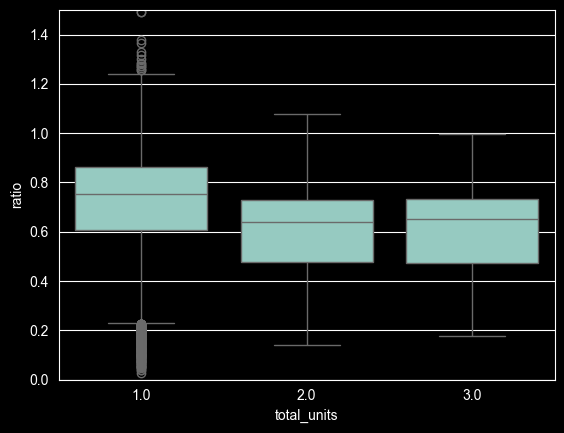

In [209]:
sns.boxplot(df1, x='total_units', y='ratio')
plt.ylim(0, 1.5)

3. Verificare, soltanto per i richiedenti con più di 55 anni, attraverso una tabella pivot se è vero
che chi ha un reddito annuo maggiore e un credit score maggiore ha più probabilità di essere in
regola con i pagamenti (status). Per fare questa analisi discretizzare le feature income e
Credit
score in 5 intervalli. (punti 3)
_

In [207]:
dfsenior = df[df['age'].isin(['55-64', '65-74', '>74'])].copy()
print(dfsenior.shape)
dfsenior['income_group'] = pd.qcut(dfsenior['income'], q=5, labels=[1, 2, 3, 4, 5])
dfsenior['Credit_Score_group'] = pd.cut(dfsenior['Credit_Score'], bins=5, labels=[1, 2, 3, 4, 5])


(8866, 24)


Credit_Score_group         1         2         3         4         5
income_group                                                        
1                   0.497238  0.494318  0.480769  0.532915  0.486804
2                   0.475758  0.524272  0.452381  0.551948  0.472892
3                   0.521472  0.453376  0.502994  0.498592  0.470109
4                   0.515723  0.538922  0.478261  0.482249  0.456193
5                   0.468468  0.491857  0.491071  0.522727  0.480122


/var/folders/d5/jd8cs2ds0lq81wp6tr68x7800000gn/T/ipykernel_53266/4037953243.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = dfsenior.pivot_table(index='income_group', columns='Credit_Score_group', values='Status', aggfunc='mean')


<Axes: xlabel='Credit_Score_group', ylabel='income_group'>

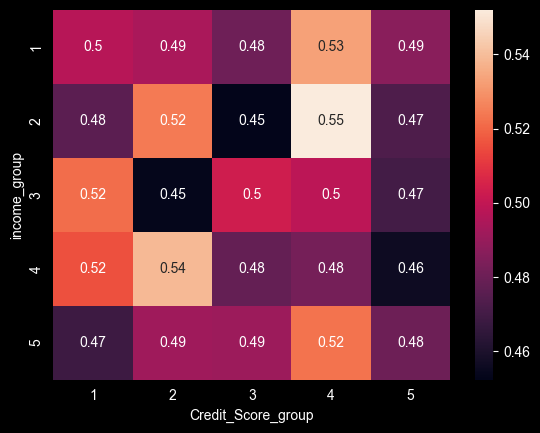

In [208]:
pivot = dfsenior.pivot_table(index='income_group', columns='Credit_Score_group', values='Status', aggfunc='mean')
print(pivot)
sns.heatmap(pivot, annot=True)

In [185]:
dfsenior['income'].value_counts()

income
3420.0     92
3300.0     92
3780.0     90
3180.0     89
2520.0     86
           ..
25200.0     1
52440.0     1
19980.0     1
14760.0     1
27900.0     1
Name: count, Length: 445, dtype: int64

4. Si immagina che chi chiede un prestito per una proprietà che è la sua residenza primaria
(occupancy
type) sia più attento ad essere in regola con i pagamenti. I dati confermano
_
questa considerazione? Visualizzare in un opportuno grafico e soltanto per i prestiti relativi a
residenze primarie, la correlazione tra l’importo del prestito e il valore della proprietà. Quali
conclusioni si possono trarre? (punti 4)

In [186]:
cross = pd.crosstab(df['occupancy_type'], df['Status'], normalize='index')
print(cross)

Status                 0         1
occupancy_type                    
ir              0.501388  0.498612
pr              0.497746  0.502254
sr              0.504367  0.495633


Correlazione tra Importo e Valore Proprietà: 0.71933633249441


<Axes: xlabel='loan_amount', ylabel='property_value'>

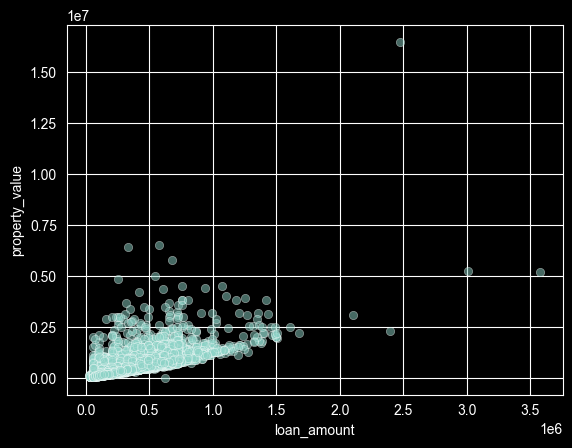

In [187]:
dfpr = df[df['occupancy_type']=='pr'].copy()
corr = dfpr['loan_amount'].corr(dfpr['property_value'])
print(f"Correlazione tra Importo e Valore Proprietà: {corr}")
sns.scatterplot(dfpr, x='loan_amount', y='property_value', alpha=0.5)

1. Si vuole predire se il prestito è in stato di inadempimento oppure no. Ricaricare il dataset
originale, eliminare eventuali attributi inutili (giustificare la scelta), eliminare le istanze che
contengono valori nulli, trasformare opportunamente i valori categorici e dividere il dataset in
train (3/4 del dataset) e test (1/4), preservando le proporzioni delle classi nella colonna target.
Confrontare la predizione ottenuta sia sul dataset train sia sul dataset test dai classificatori
ExtraTreeClassifier, KNeighborsClassifier e da un dummy classifier a scelta. Effettuare alcune
considerazioni sui risultati ottenuti, tenendo in considerazione i valori di F1 e della confusion
matrix. (punti 4)

In [188]:
df = pd.read_csv('dataset_modified.csv')
df.drop(['ID', 'year'], axis=1, inplace=True)
df.dropna(inplace=True)
enc = OrdinalEncoder()
cat_features = [col for col in df.columns if df[col].dtype == object]
names_cols = df.columns
df = enc.fit_transform(df)
df = pd.DataFrame(df, columns=names_cols)

X = df.drop('Status', axis=1).copy()
y = df['Status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify=y)

In [189]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
F1_et_train = f1_score(y_pred, y_train, average = 'weighted')
acc_et_train = accuracy_score(y_pred, y_train)
y_pred = et.predict(X_test)
F1_dt_test = f1_score(y_pred, y_test, average = 'weighted')
acc_dt_test = accuracy_score(y_pred, y_test)

print(f'Per il extra Tree, F1 nel train: {F1_dt_train}, per il test {F1_dt_test}')
print(f'Per il extra Tree, accuracy nel train: {acc_dt_train}, per il test {acc_dt_test}')

print(confusion_matrix(y_pred, y_test))

Per il extra Tree, F1 nel train: 1.0, per il test 0.5084103018871998
Per il extra Tree, accuracy nel train: 1.0, per il test 0.5083463745435577
[[999 962]
 [923 950]]


In [190]:
kn = KNeighborsClassifier()

kn.fit(X_train, y_train)
y_pred = kn.predict(X_train)
F1_kn_train = f1_score(y_pred, y_train, average = 'weighted')
acc_kn_train = accuracy_score(y_pred, y_train)
y_pred = kn.predict(X_test)
F1_kn_test = f1_score(y_pred, y_test, average = 'weighted')
acc_kn_test = accuracy_score(y_pred, y_test)

print(f'Per il KNeighborsClassifier, F1 nel train: {F1_kn_train}, per il test {F1_kn_test}')
print(f'Per il KNeighborsClassifier, accuracy nel train: {acc_kn_train}, per il test {acc_kn_test}')

print(confusion_matrix(y_pred, y_test))

Per il KNeighborsClassifier, F1 nel train: 0.688496559966571, per il test 0.4955651649311092
Per il KNeighborsClassifier, accuracy nel train: 0.6884946517088443, per il test 0.495565988523735
[[953 965]
 [969 947]]


2. Confrontare i valori di F1 del punto precedente con quelli ottenuti con una 10 Fold cross
validation. (punti 1)

In [191]:
cross = cross_val_score(et, X, y, cv = 10, scoring='f1_weighted')
print(f'Per il dt con kfold: {cross}, con media {cross.mean()}')
cross = cross_val_score(kn, X, y, cv = 10, scoring='f1_weighted')
print(f'Per il kn con kfold: {cross}, con media {cross.mean()}')

Per il dt con kfold: [0.49002745 0.48686689 0.50844855 0.50873519 0.52010684 0.47354671
 0.52555368 0.50551733 0.50682749 0.49770279], con media 0.5023332921734706
Per il kn con kfold: [0.50574687 0.48239192 0.50191503 0.50281906 0.52500299 0.51663323
 0.49806936 0.51193326 0.5014598  0.50601538], con media 0.5051986880034819


3. Calcolare, nelle predizioni ottenute dai modelli dei classificatori ExtraTreeClassifier e
KNeighborsClassifier, la probabilità di avere un prestito in stato di inadempimento se si è donna.
La probabilità è la stessa per gli uomini? Riportare alcune considerazioni sul confronto dei due
modelli. (punti 3)

In [192]:
categorie = enc.categories_
for i, nome_categoria in enumerate(categorie[0]):
    print(f"Indice {i} -> Categoria: {nome_categoria}")

Indice 0 -> Categoria: Female
Indice 1 -> Categoria: Joint
Indice 2 -> Categoria: Male
Indice 3 -> Categoria: Sex Not Available


In [193]:
Xfair = X_test.copy()
Xfair['Status'] =y_test

uomo = Xfair[Xfair['Gender']==1].copy()
donna = Xfair[Xfair['Gender']==2].copy()

prob_uomo = (uomo['Status'].sum())/uomo.shape[0]
prob_donna = (donna['Status'].sum())/donna.shape[0]

print(f'Prob uomo: {prob_uomo}')
print(f'Prob donna: {prob_donna}')

Prob uomo: 0.5166666666666667
Prob donna: 0.4732824427480916


In [194]:
Xu = uomo.drop('Status', axis =1)
yu= uomo['Status']
y_pred = et.predict(Xu)
acc_u = accuracy_score(y_pred, yu)
print(f'Uomo: {acc_u}')

Xd = donna.drop('Status', axis =1)
yd= donna['Status']
y_pred = et.predict(Xd)
acc_d = accuracy_score(y_pred, yd)
print(f'Donna: {acc_d}')

Uomo: 0.5148148148148148
Donna: 0.5133587786259542


In [195]:
Xu = uomo.drop('Status', axis =1)
yu= uomo['Status']
y_pred = kn.predict(Xu)
acc_u = accuracy_score(y_pred, yu)
print(f'Uomo: {acc_u}')

Xd = donna.drop('Status', axis =1)
yd= donna['Status']
y_pred = kn.predict(Xd)
acc_d = accuracy_score(y_pred, yd)
print(f'Donna: {acc_d}')

Uomo: 0.4888888888888889
Donna: 0.5248091603053435


4. Analizzare la correlazione tra le feature del dataset, creare un dataframe che contiene, oltre
alla colonna target, le 2 feature più correlate positivamente al target e le 2 feature più
correlate negativamente al target. La predizione dell’ ExtraTreeClassifier migliora? (punti 4)

In [196]:
corr = df.corr()
top5 = corr['Status'].sort_values(ascending=False)[0:3].index.tolist()
top5.extend(corr['Status'].sort_values(ascending=True)[0:2].index.tolist())
df5 = df[top5].copy()

X = df5.drop('Status', axis=1).copy()
y = df5['Status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify=y)

In [197]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
F1_et_train = f1_score(y_pred, y_train, average = 'weighted')
acc_et_train = accuracy_score(y_pred, y_train)
y_pred = et.predict(X_test)
F1_dt_test_top5 = f1_score(y_pred, y_test, average = 'weighted')
acc_dt_test_top5 = accuracy_score(y_pred, y_test)

print(f'Per il extra Tree, F1 nel train: {F1_dt_train}, per il test {F1_dt_test_top5}')
print(f'Per il extra Tree, accuracy nel train: {acc_dt_train}, per il test {acc_dt_test_top5}')

print(confusion_matrix(y_pred, y_test))

Per il extra Tree, F1 nel train: 1.0, per il test 0.5066658962429293
Per il extra Tree, accuracy nel train: 1.0, per il test 0.5049556598852374
[[1083 1059]
 [ 839  853]]


5. A partire dal dataset utilizzato al punto 1, trovare i valori migliori dei parametri criterion
e max
depth del classificatore ExtraTreeClassifier. Come varia il valore di F1? (punti 2)
_

In [198]:
df = pd.read_csv('dataset_modified.csv')
df.drop(['ID', 'year'], axis=1, inplace=True)
df.dropna(inplace=True)
enc = OrdinalEncoder()
cat_features = [col for col in df.columns if df[col].dtype == object]
names_cols = df.columns
df = enc.fit_transform(df)
df = pd.DataFrame(df, columns=names_cols)

X = df.drop('Status', axis=1).copy()
y = df['Status'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify=y)

In [199]:
et = ExtraTreesClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5]
}
gs = GridSearchCV(et, params)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_train)
acc_gs_dt_train = accuracy_score(y_pred, y_train)
y_pred = gs.predict(X_test)
acc_gs_dt_test = accuracy_score(y_pred, y_test)
print(f'Per il train: {acc_gs_dt_train}, per il test: {acc_gs_dt_test}')
print(f'Con parametri: {gs.best_params_}')
print(gs.best_estimator_, gs.best_score_)
best_params = gs.best_params_

Per il train: 0.5215236107487607, per il test: 0.48982785602503914
Con parametri: {'criterion': 'gini', 'max_depth': 2}
ExtraTreesClassifier(max_depth=2) 0.5096958602038694


6. Creare una pipeline in cui, a partire dal dataset utilizzato al punto 1, i valori degli attributi
income e loan
amount sono discretizzati in 7 intervalli, Credit
Score è scalato con
_
_
StandardScaler e tutti gli altri attributi sono lasciati invariati. Applicare il modello
ExtraTreeClassifier e confrontare i risultati. (punti 3)

In [200]:
preprocessing = ColumnTransformer(transformers=[
    ('disc', KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform'), ['income', 'loan_amount']),
    ('SS', StandardScaler(), ['Credit_Score']),
], remainder='passthrough')

model = ExtraTreesClassifier(**best_params)

pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', model)
])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
acc_pipe_train = accuracy_score(y_pred, y_train)
y_pred = pipe.predict(X_test)
acc_pipe_test = accuracy_score(y_pred, y_test)
print(f'L accuratezza nel train è {acc_pipe_train}, mentre nel test {acc_pipe_test}')


L accuratezza nel train è 0.5193495086529264, mentre nel test 0.48330725091288473


7. Aggiungere alla pipeline precedente la funzione TruncatedSVD per ridurre la dimensionalità
del dataset. Valutare i valori migliori di n
components di TruncatedSVD e dei parametri
_
criterion e max
depth di ExtraTreeClassifier, confronta i risultati con i precedenti. (punti 3)

In [201]:
from sklearn.decomposition import TruncatedSVD

pipe2 = Pipeline([
    ('preprocessing', preprocessing),
    ('SVD', TruncatedSVD()),
    ('classifier', model)
])

params = {
    "SVD__n_components": [2, 4, 6],
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": [2, 3, 4, 5]
}


gs = GridSearchCV(pipe2, params)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_train)
acc_gs_dt_train = accuracy_score(y_pred, y_train)
y_pred = gs.predict(X_test)
acc_gs_dt_test = accuracy_score(y_pred, y_test)
print(f'Per il train: {acc_gs_dt_train}, per il test: {acc_gs_dt_test}')
print(f'Con parametri: {gs.best_params_}')
print(gs.best_estimator_, gs.best_score_)
best_params = gs.best_params_

Per il train: 0.5330028698147665, per il test: 0.5091288471570161
Con parametri: {'SVD__n_components': 6, 'classifier__criterion': 'entropy', 'classifier__max_depth': 3}
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('disc',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=7,
                                                                   strategy='uniform'),
                                                  ['income', 'loan_amount']),
                                                 ('SS', StandardScaler(),
                                                  ['Credit_Score'])])),
                ('SVD', TruncatedSVD(n_components=6)),
                ('classifier',
                 ExtraTreesClassifier(criterion='entropy', max_depth=3))]) 0.5133489797076234
